In this End to End Project, we'll be creating a NLP model to Predict if the asked Question is duplicate or not?
Suppose,
Who is the PM of India?
Who is the current PM of India?
These are duplicate questions, because of same semantic meaning

Who is PM of Pakistan, almost every vocabs are same, but the meaning is not,("of Pakistan", this changed the entire meaning of sentence..)
so this is not Duplicate

Refrenced Dataset from Quora

we will solve this use case with ML approach

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/KIIT/Desktop/Datasets/Quora/train.csv/train.csv")

In [3]:
df.shape

(404290, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
285480,285480,5110,99933,What is your best sexual experience?,What have been your best sexual experiences?,1
206625,206625,310099,310100,What is our national animal?,Which is our national animal?,1
203051,203051,305548,305549,What is the role of Business technology analys...,What is the role of a Business technology anal...,1
383583,383583,55048,279953,What was the kindest thing you have ever done ...,What is the kindest thing you have ever done f...,1
40182,40182,54335,72729,What font does Twitter use?,What font does WordPress use?,0


In [6]:
#this is a Binary Classification Problem

In [7]:
df.isnull().sum()  #we'll remove these values, negligible!

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df=df.sample(100000)

In [11]:
import re
from bs4 import BeautifulSoup

In [12]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [13]:
preprocess("Hii,<my > name is Yuvraj Singh")

'hii  name is yuvraj singh'

In [14]:
df['question1']=df['question1'].apply(preprocess)
df['question2']=df['question2'].apply(preprocess)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [15]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
365212,365212,495321,495322,what do you think the chances are that trump w...,do you think trump will be impeached,1
199011,199011,300367,17275,how did isro conduct a mars mission with a muc...,how did india succeed in its mars mission with...,1
144400,144400,176072,187615,could donald trump be president,what are the chances of donald trump winning t...,1
115991,115991,189039,189040,did the vikings occupy all of scandinavia,has anyone used quicksprout fan finder is it ...,0
135886,135886,216929,216930,should i turn into an asshole to attract girls,do girls find guys with white hair less attrac...,0


0    62.85
1    37.15
Name: is_duplicate, dtype: float64


<AxesSubplot:>

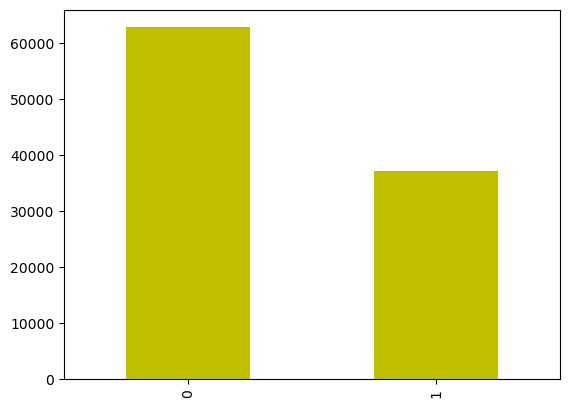

In [16]:
print(round((df['is_duplicate'].value_counts()/(df['is_duplicate'].count())*100),2))
df['is_duplicate'].value_counts().plot(kind='bar',color='y')

# we see that data is imbalanced and kinda biased towars '1' class, so we need to settle it

In [17]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print("Total Unique Questions: ",np.unique(qid).shape[0])

x=qid.value_counts()>1
print("Repeating Questions: ",x[x].shape[0])

#total qid1+qid2 lakhs around questions, using qids..
# 5 lakh smthng are unique, 1 lakh repeating

Total Unique Questions:  165609
Repeating Questions:  19408


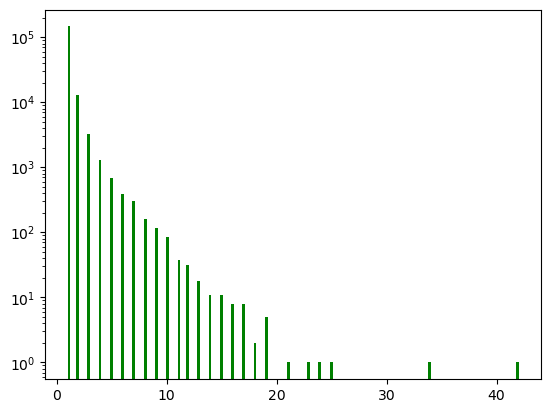

In [18]:
plt.hist(qid.value_counts().values,bins=160,color='g')
plt.yscale('log')
plt.show()

#here, 1 baar occur hone wale questions is more than 10^5, similarly koi 1 question hai jo almost 160 times aaya h.. 

In [19]:
#If we go through very simple approach,applying BOW on question1 and question2 column, marking is_dup as target
# we were getting accuracy of around 75(RF Classifier) and 73(XGB Classifier)
#so will increase it with doing some other feature engineering etc, done that in some another notebook

In [20]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
365212,365212,495321,495322,what do you think the chances are that trump w...,do you think trump will be impeached,1
199011,199011,300367,17275,how did isro conduct a mars mission with a muc...,how did india succeed in its mars mission with...,1
144400,144400,176072,187615,could donald trump be president,what are the chances of donald trump winning t...,1
115991,115991,189039,189040,did the vikings occupy all of scandinavia,has anyone used quicksprout fan finder is it ...,0
135886,135886,216929,216930,should i turn into an asshole to attract girls,do girls find guys with white hair less attrac...,0


In [21]:
# #lets create some features like

# q1 len
# q2 len
# q1 (total words)
# q2 (total words)
# common words
# total words(unique words in both columns)
# word share(common word/total word)

In [22]:
df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()

In [23]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
365212,365212,495321,495322,what do you think the chances are that trump w...,do you think trump will be impeached,1,62,36
199011,199011,300367,17275,how did isro conduct a mars mission with a muc...,how did india succeed in its mars mission with...,1,70,168
144400,144400,176072,187615,could donald trump be president,what are the chances of donald trump winning t...,1,31,62
115991,115991,189039,189040,did the vikings occupy all of scandinavia,has anyone used quicksprout fan finder is it ...,0,41,50
135886,135886,216929,216930,should i turn into an asshole to attract girls,do girls find guys with white hair less attrac...,0,46,78


In [24]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [25]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)
#all words will be converted into lower order, and splitted " ", and strip for removing whitespaces,
# converted into set intentionally, so that we can apply intersection function
df['word_common']=df.apply(common_words,axis=1)

In [26]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+len(w2))

df['total_words']=df.apply(total_words,axis=1)

In [27]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
365212,365212,495321,495322,what do you think the chances are that trump w...,do you think trump will be impeached,1,62,36,12,7,7,19
199011,199011,300367,17275,how did isro conduct a mars mission with a muc...,how did india succeed in its mars mission with...,1,70,168,14,33,8,40
144400,144400,176072,187615,could donald trump be president,what are the chances of donald trump winning t...,1,31,62,5,11,2,15
115991,115991,189039,189040,did the vikings occupy all of scandinavia,has anyone used quicksprout fan finder is it ...,0,41,50,7,10,0,17
135886,135886,216929,216930,should i turn into an asshole to attract girls,do girls find guys with white hair less attrac...,0,46,78,9,17,2,25


In [28]:
df['word_share']=round(df['word_common']/df['total_words'],2)

In [29]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
365212,365212,495321,495322,what do you think the chances are that trump w...,do you think trump will be impeached,1,62,36,12,7,7,19,0.37
199011,199011,300367,17275,how did isro conduct a mars mission with a muc...,how did india succeed in its mars mission with...,1,70,168,14,33,8,40,0.20
144400,144400,176072,187615,could donald trump be president,what are the chances of donald trump winning t...,1,31,62,5,11,2,15,0.13
115991,115991,189039,189040,did the vikings occupy all of scandinavia,has anyone used quicksprout fan finder is it ...,0,41,50,7,10,0,17,0.00
135886,135886,216929,216930,should i turn into an asshole to attract girls,do girls find guys with white hair less attrac...,0,46,78,9,17,2,25,0.08


In [30]:
# lets find outliers, if any?

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


min char:  0
max char:  397
avg char:  58


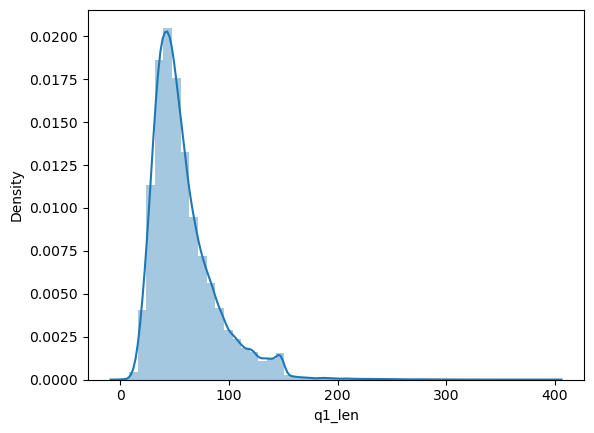

In [31]:
sns.distplot(df['q1_len'])
print('min char: ',df['q1_len'].min())
print('max char: ',df['q1_len'].max())
print('avg char: ',int(df['q1_len'].mean()))

# min char=1, its an outlier, max=623..Umm kinda outlier

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


min char:  0
max char:  1162
avg char:  59


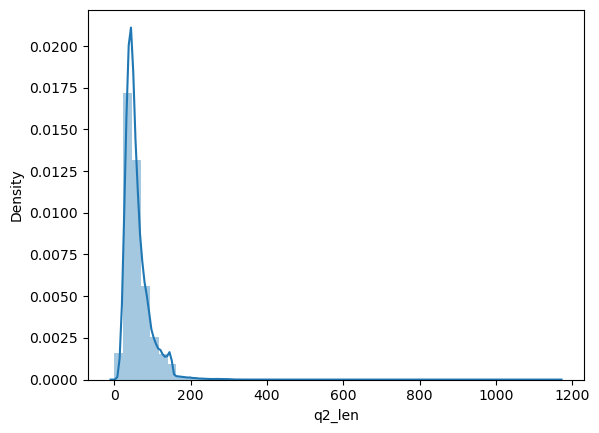

In [32]:
sns.distplot(df['q2_len'])
print('min char: ',df['q2_len'].min())
print('max char: ',df['q2_len'].max())
print('avg char: ',int(df['q2_len'].mean()))

In [33]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common',
       'total_words', 'word_share'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 365212 to 360390
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            100000 non-null  int64  
 1   qid1          100000 non-null  int64  
 2   qid2          100000 non-null  int64  
 3   question1     100000 non-null  object 
 4   question2     100000 non-null  object 
 5   is_duplicate  100000 non-null  int64  
 6   q1_len        100000 non-null  int64  
 7   q2_len        100000 non-null  int64  
 8   q1_num_words  100000 non-null  int64  
 9   q2_num_words  100000 non-null  int64  
 10  word_common   100000 non-null  int64  
 11  total_words   100000 non-null  int64  
 12  word_share    100000 non-null  float64
dtypes: float64(1), int64(10), object(2)
memory usage: 10.7+ MB


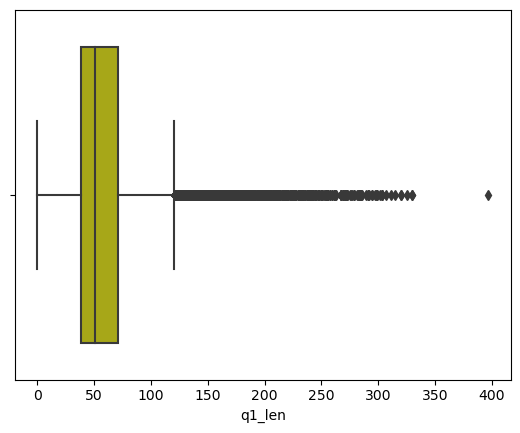

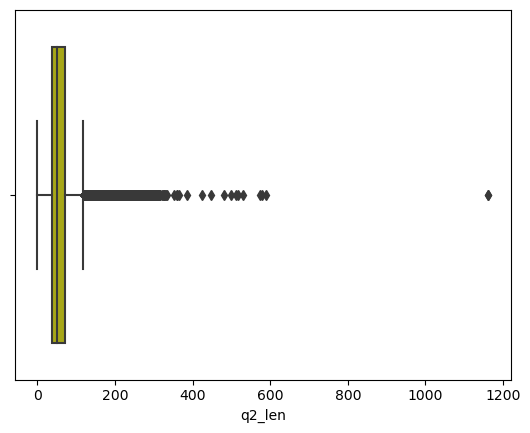

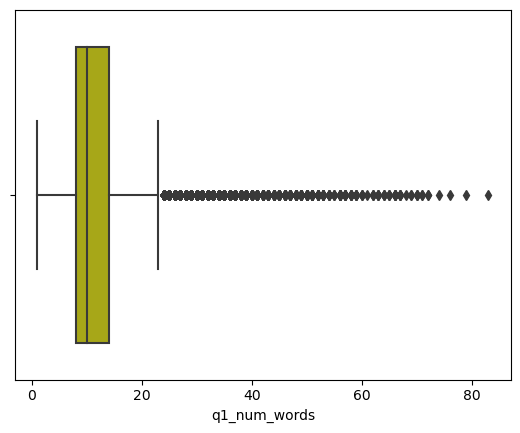

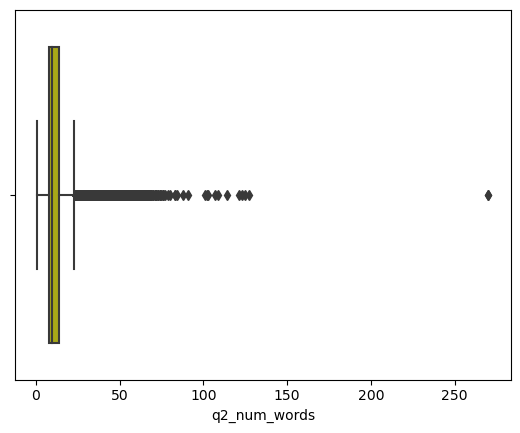

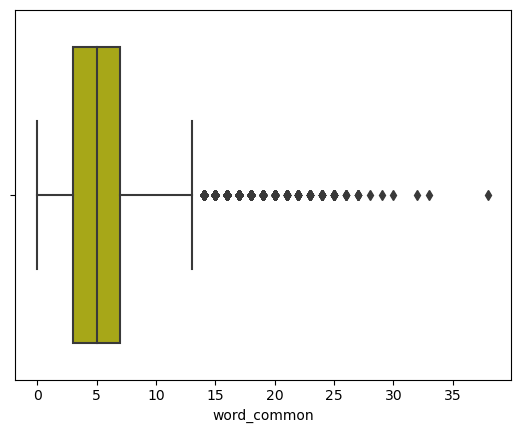

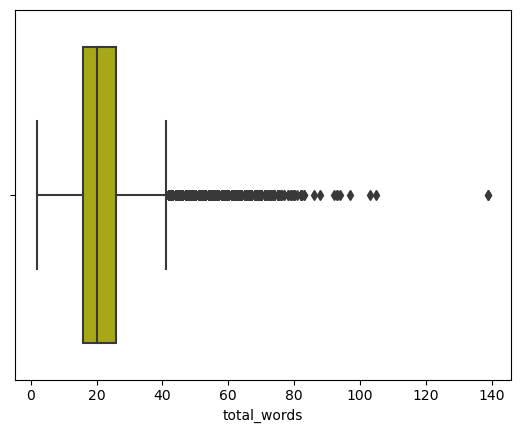

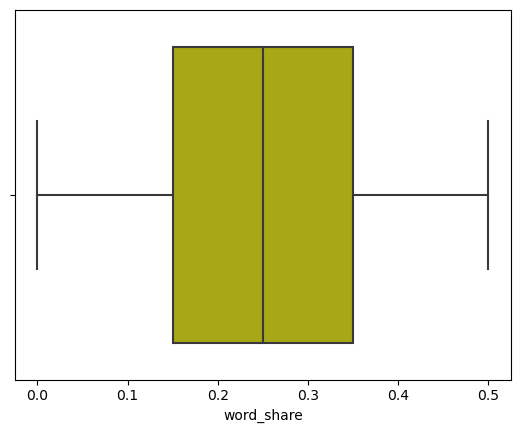

In [35]:
col = ['q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common',
       'total_words', 'word_share']

for column in col:
    sns.boxplot(x=df[column],color='y')
    plt.show()
    
    #only word share has no outlier, we will not proceed to fix it, 
#     because manipulating the sentence can lead to change the semantic meaning

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


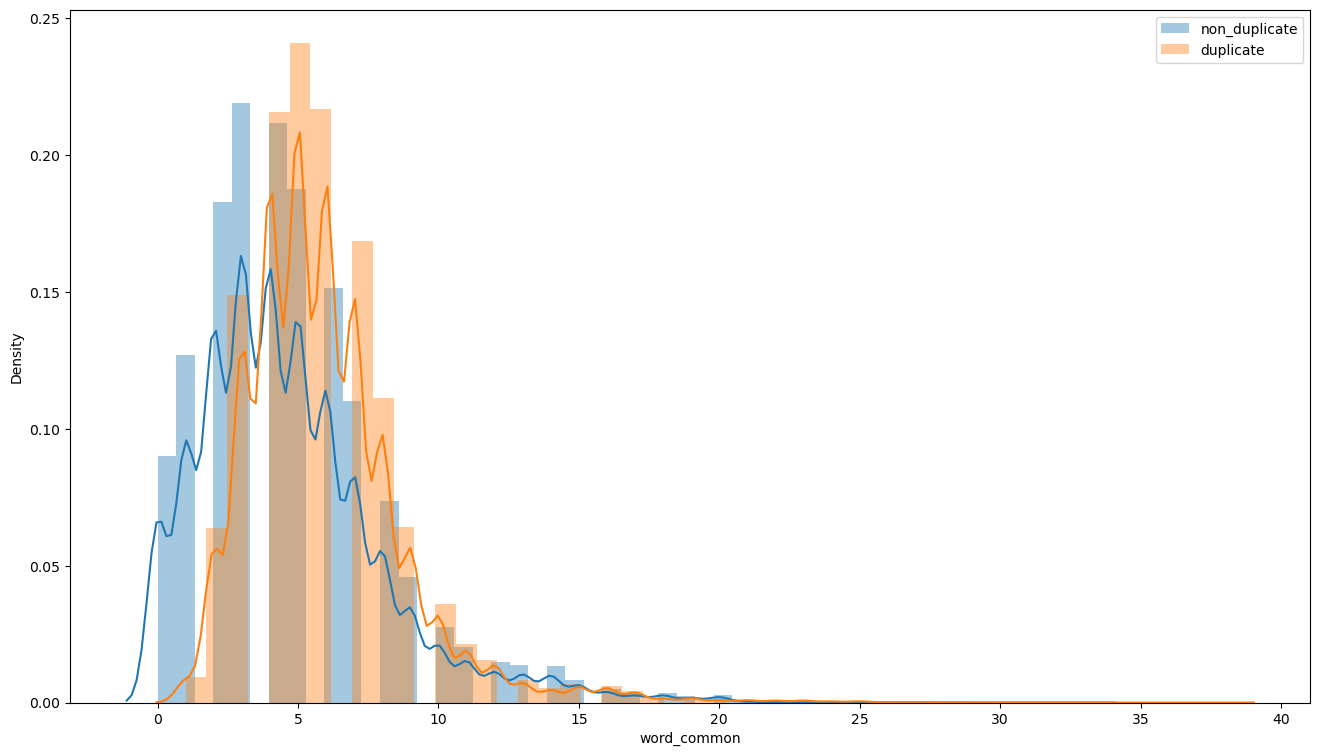

In [36]:
plt.figure(figsize=(16,9))
sns.distplot(df[df['is_duplicate']==0]['word_common'],label='non_duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

#from this diagram, we can clearly see that jab common word count<5, prob. of non-duplicacy word is higher

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


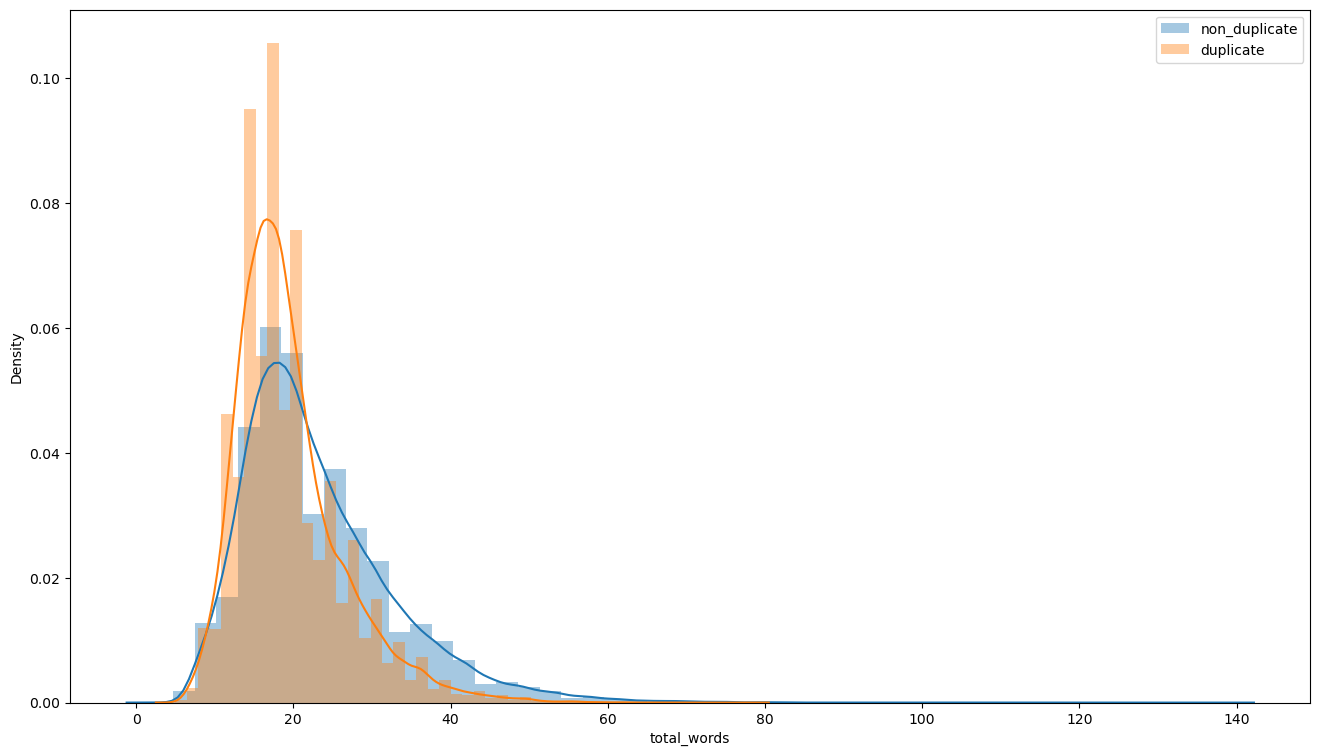

In [37]:
plt.figure(figsize=(16,9))
sns.distplot(df[df['is_duplicate']==0]['total_words'],label='non_duplicate')
sns.distplot(df[df['is_duplicate']==1]['total_words'],label='duplicate')
plt.legend()
plt.show()

#here we can see that if total words<25, duplicacy prob. higher, 25+ non duplicacy prob. higher

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


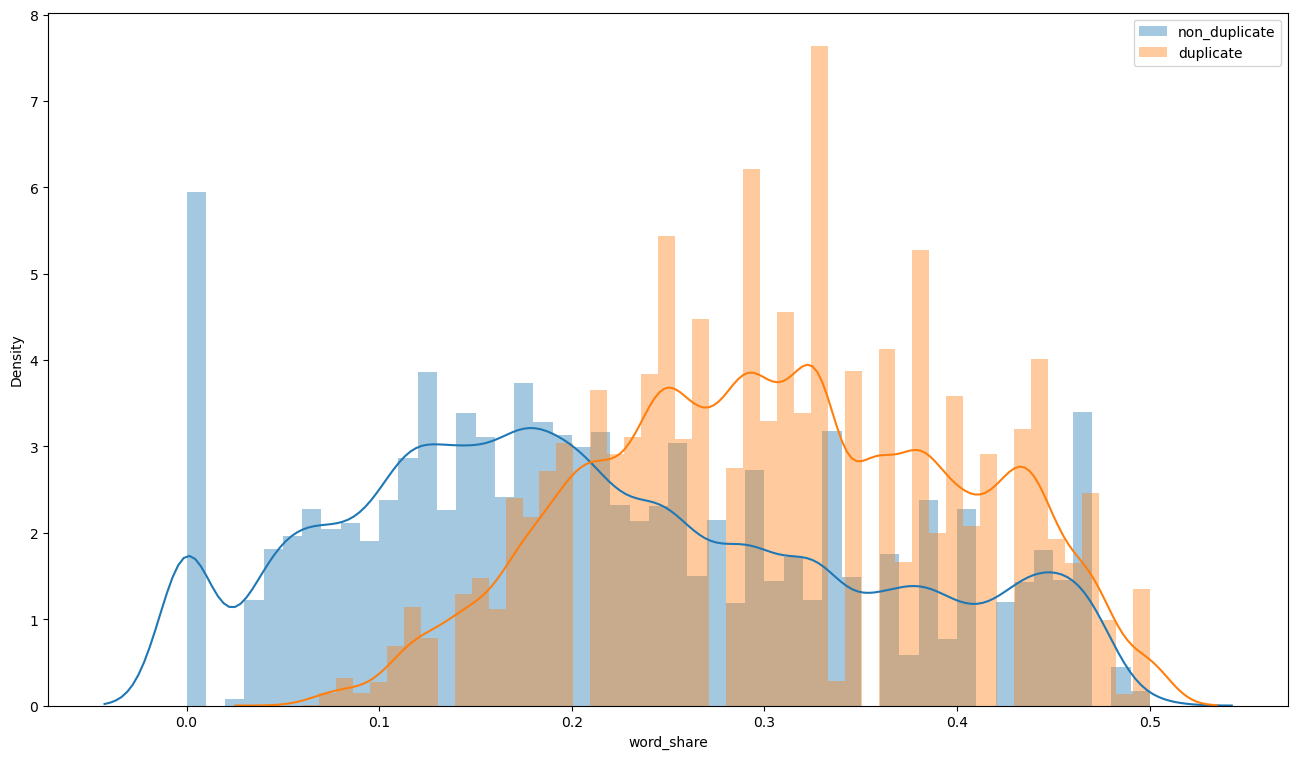

In [38]:
plt.figure(figsize=(16,9))
sns.distplot(df[df['is_duplicate']==0]['word_share'],label='non_duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

# form this, we can see that point of interaction, near to 0.2...
# 0.2 ke pehle..non duplicacy higher, 0.2 ke baad duplicacy higher

In [39]:
ques=df[['question1','question2']]
ques.head()

,question1,question2
365212,what do you think the chances are that trump w...,do you think trump will be impeached
199011,how did isro conduct a mars mission with a muc...,how did india succeed in its mars mission with...
144400,could donald trump be president,what are the chances of donald trump winning t...
115991,did the vikings occupy all of scandinavia,has anyone used quicksprout fan finder is it ...
135886,should i turn into an asshole to attract girls,do girls find guys with white hair less attrac...


In [40]:
# final=df.drop(columns=['id','qid1','qid2','question1','question2'])
# print(final.shape)
# final.head()

In [41]:
# from sklearn.feature_extraction.text import CountVectorizer

In [42]:
# # applying Bow
# questions=list(ques['question1'])+list(ques['question2'])  #creating corpus
# cv=CountVectorizer(max_features=1000)
# q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [43]:
# temp_df1=pd.DataFrame(q1_arr,index=ques.index)
# temp_df2=pd.DataFrame(q2_arr,index=ques.index)
# temp_df=pd.concat([temp_df1,temp_df2],axis=1)
# temp_df.shape


# # #10000 bcoz for both dfs, we have 4k-4k max_features

In [44]:
# final_df=pd.concat([final,temp_df],axis=1)
# print(final_df.shape)

In [45]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.22,random_state=2)

In [46]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# rf=RandomForestClassifier()
# rf.fit(X_train,y_train)
# y_pred=rf.predict(X_test)
# accuracy_score(y_test,y_pred)

In [47]:
# from xgboost import XGBClassifier
# xgb=XGBClassifier()
# xgb.fit(X_train,y_train)
# y_pred=xgb.predict(X_test)
# accuracy_score(y_test,y_pred)

In above code, we have done basic preprocessing and getting accuracy score of 74 using randomforest and by using xgboost, accuracy score of 76%...so let's do advance preprocessing technique...

In [49]:
#we can increase the accuracy by doing advance feature engineering techniques..

# cwc-min: min(words(q1,q2))     common words/sent. with min words
# cwc-max: max(words(q1,q2))     common words/sent. with max words
# csc-min: min(words(q1,q2))     common stop words/sentence. with min stopwords
# csc-max: max(words(q1,q2))     common stop words/sent. with max words
# ctc-min: common tokens/min(tokens(q1,q2))  common tokens/sentence having min tokens
# ctc-max: common tokens/max(tokens(q1,q2))  common tokens/sentence having max tokens
# last_word_eq: if last words of both sentence match or not?
# first_word_eq: if first words of both sentence match or not?

# Length based features..
# mean length: mean of the tokens of both sentence
# abs distance: absolute difference of two sentence
# longest substring ratio: longest substring/sentence having min words

#Fuzzy Features..

In [50]:
# Advanced Features
#tokens, stopwords, and non stopwords
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [51]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [52]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
365212,365212,495321,495322,what do you think the chances are that trump w...,do you think trump will be impeached,1,62,36,12,7,...,19,0.37,0.999967,0.749981,0.999975,0.499994,0.999986,0.583328,1.0,0.0
199011,199011,300367,17275,how did isro conduct a mars mission with a muc...,how did india succeed in its mars mission with...,1,70,168,14,33,...,40,0.20,0.374995,0.214284,0.999980,0.384612,0.571424,0.242424,0.0,1.0
144400,144400,176072,187615,could donald trump be president,what are the chances of donald trump winning t...,1,31,62,5,11,...,15,0.13,0.499988,0.333328,0.000000,0.000000,0.399992,0.181817,0.0,0.0
115991,115991,189039,189040,did the vikings occupy all of scandinavia,has anyone used quicksprout fan finder is it ...,0,41,50,7,10,...,17,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
135886,135886,216929,216930,should i turn into an asshole to attract girls,do girls find guys with white hair less attrac...,0,46,78,9,17,...,25,0.08,0.499988,0.249997,0.000000,0.000000,0.222220,0.124999,1.0,0.0


In [53]:
import distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0] * 3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2
    
    # Calculate the longest common substring ratio
    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))


In [54]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
365212,365212,495321,495322,what do you think the chances are that trump w...,do you think trump will be impeached,1,62,36,12,7,...,0.749981,0.999975,0.499994,0.999986,0.583328,1.0,0.0,5.0,9.5,0.648649
199011,199011,300367,17275,how did isro conduct a mars mission with a muc...,how did india succeed in its mars mission with...,1,70,168,14,33,...,0.214284,0.999980,0.384612,0.571424,0.242424,0.0,1.0,19.0,23.5,0.295775
144400,144400,176072,187615,could donald trump be president,what are the chances of donald trump winning t...,1,31,62,5,11,...,0.333328,0.000000,0.000000,0.399992,0.181817,0.0,0.0,6.0,8.0,0.437500
115991,115991,189039,189040,did the vikings occupy all of scandinavia,has anyone used quicksprout fan finder is it ...,0,41,50,7,10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,8.0,0.047619
135886,135886,216929,216930,should i turn into an asshole to attract girls,do girls find guys with white hair less attrac...,0,46,78,9,17,...,0.249997,0.000000,0.000000,0.222220,0.124999,1.0,0.0,7.0,12.5,0.170213


In [55]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common',
       'total_words', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'longest_substr_ratio'],
      dtype='object')

In [56]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [57]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

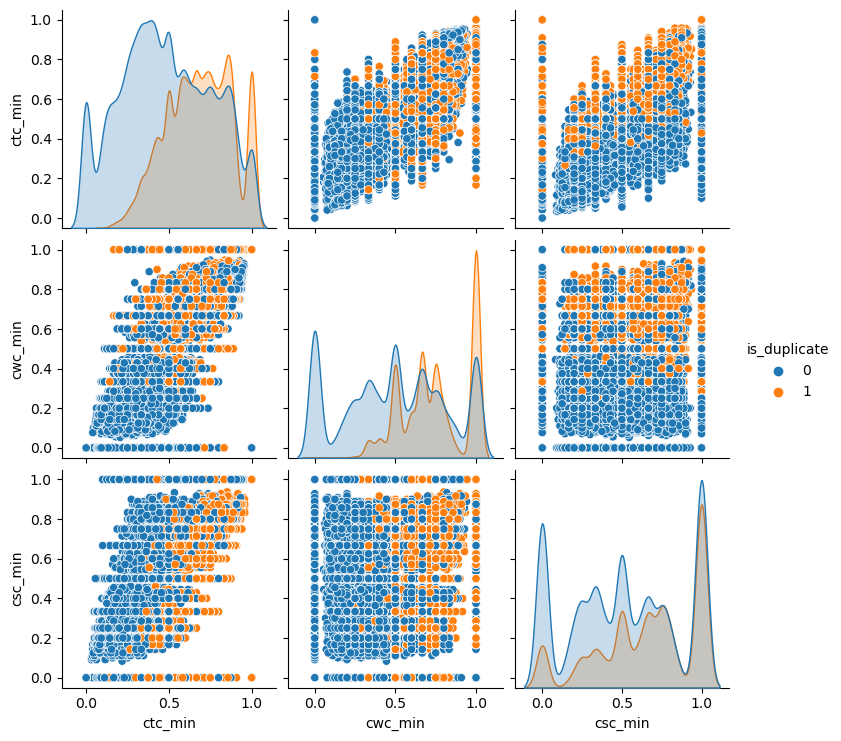

In [58]:
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')
plt.show()

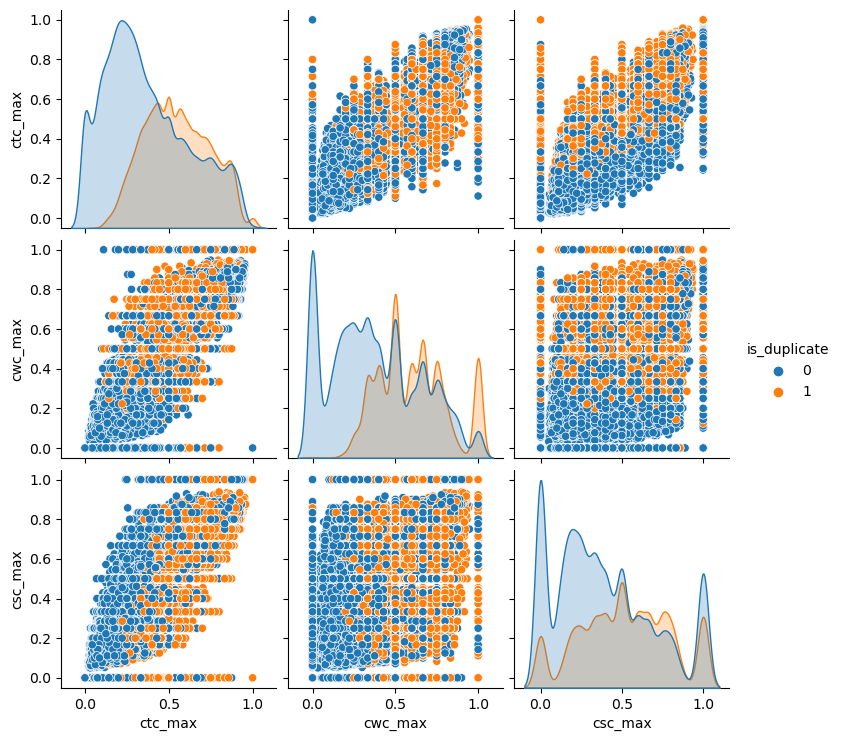

In [59]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')
plt.show()

In [60]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
365212,365212,495321,495322,what do you think the chances are that trump w...,do you think trump will be impeached,1,62,36,12,7,...,0.583328,1.0,0.0,5.0,9.5,0.648649,73,78,73,100
199011,199011,300367,17275,how did isro conduct a mars mission with a muc...,how did india succeed in its mars mission with...,1,70,168,14,33,...,0.242424,0.0,1.0,19.0,23.5,0.295775,46,63,48,73
144400,144400,176072,187615,could donald trump be president,what are the chances of donald trump winning t...,1,31,62,5,11,...,0.181817,0.0,0.0,6.0,8.0,0.437500,45,61,45,56
115991,115991,189039,189040,did the vikings occupy all of scandinavia,has anyone used quicksprout fan finder is it ...,0,41,50,7,10,...,0.000000,0.0,0.0,2.0,8.0,0.047619,35,39,36,36
135886,135886,216929,216930,should i turn into an asshole to attract girls,do girls find guys with white hair less attrac...,0,46,78,9,17,...,0.124999,1.0,0.0,7.0,12.5,0.170213,45,50,47,53


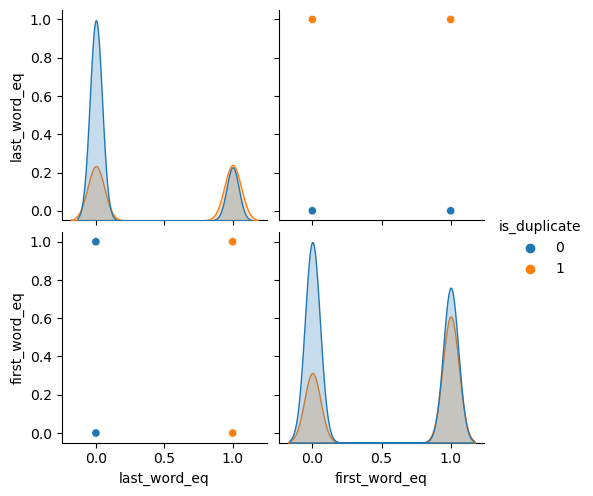

In [61]:
sns.pairplot(df[['last_word_eq','first_word_eq','is_duplicate']],hue="is_duplicate")
plt.show()

#from this plot we can see that if both q1 and q2 has no last word equal, then it is no duplicate
# simlarly if both q1 and q2 has first word equal, then it is almost similar

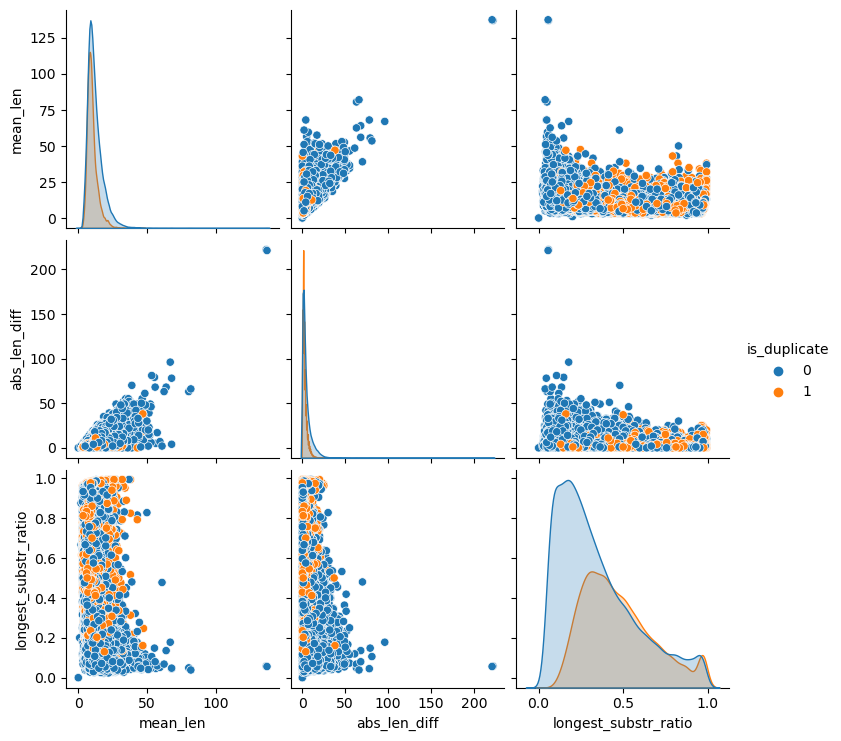

In [62]:
sns.pairplot(df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue="is_duplicate")
plt.show()

In [63]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common',
       'total_words', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

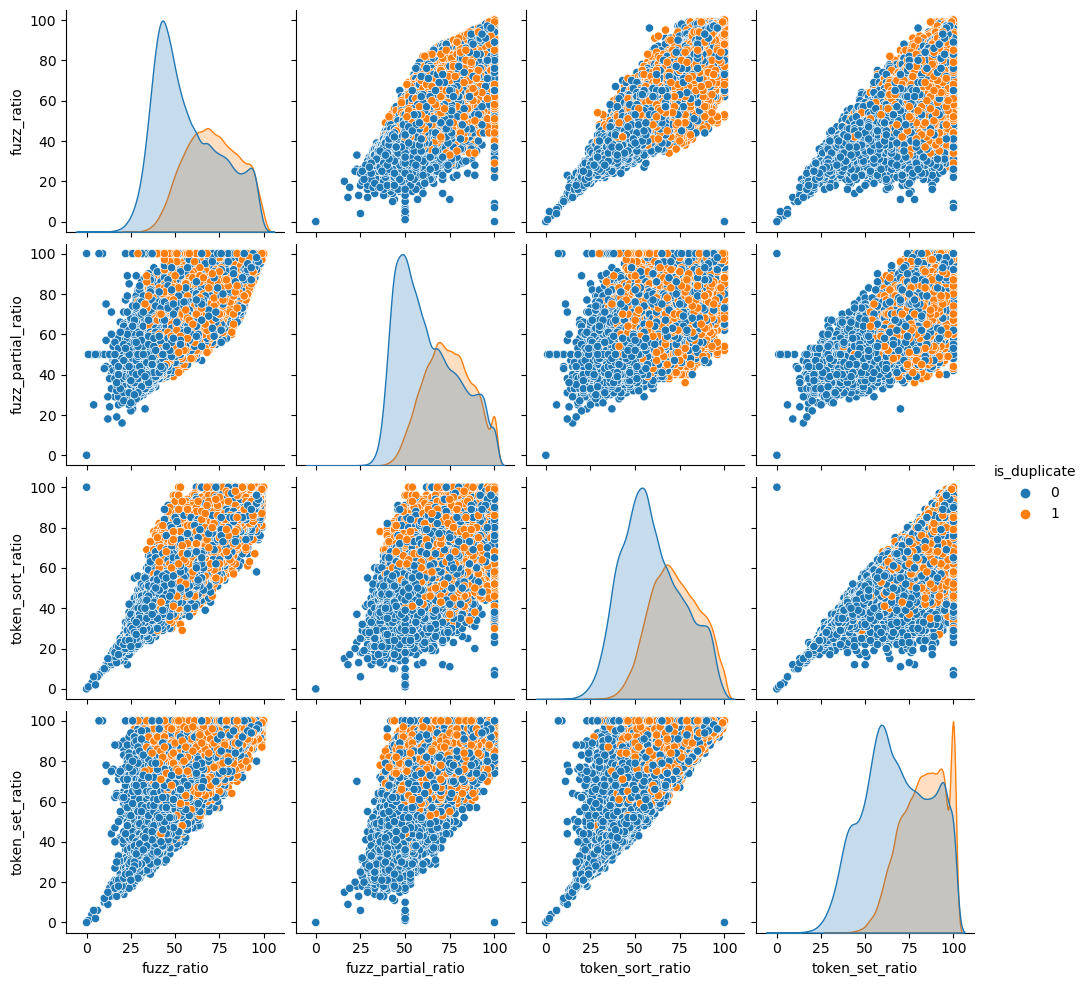

In [64]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio','is_duplicate']],hue="is_duplicate")
plt.show()

In [65]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = df['is_duplicate'].values

In [ ]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca 
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

#TSNE is a Dimensionality reduction technique, which is used on non linear Data set, PCA is for Linear dataset,
# moreover, TSNE is also important for Data Visualization

In [66]:
#TSNE is a Dimensionality reduction technique, which is used on non linear Data set, PCA is for Linear dataset,
# moreover, TSNE is also important for Data Visualization

# Working of T-SNE,
# convert all distance into Probability
# use formula: Pj/i: -|xi-xj|^2/2(sigmai)^2    |xi-xj|=error, sigma=variance
# since using this formula will give long formatted result, but probability should be within 0-1,
# so we do normalization, by dividing e/Pj/i

# we are doing all these things on same plane i, but we can't do it for every datapoints because of different behaviours
# so instead we use new formula: 
# qj/i: e^(-|yi-yj|^2)/e^(Sum(-|yi-yk|^2)), where we assume that sigma(variance)=1/sqrt(2)*pie and 
#     all varainces are same across distributions..
# for complex questions, we can use basic formula, so we have to sue this one, so that variance shpould be constant
# for all distributions..
# works on t-distribution graph, because of larger possible tail  

In [ ]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid  of T-SNE, conerted into 2D
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

#here we can that there is some difference so we can differentiate easily, if there was overlapping all over the graph,
# then it could have hard to understand and explain

In [67]:
# from all these things, we can  conclude that somewhere these 15 features are important for model building...

In [68]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
365212,what do you think the chances are that trump w...,do you think trump will be impeached
199011,how did isro conduct a mars mission with a muc...,how did india succeed in its mars mission with...
144400,could donald trump be president,what are the chances of donald trump winning t...
115991,did the vikings occupy all of scandinavia,has anyone used quicksprout fan finder is it ...
135886,should i turn into an asshole to attract girls,do girls find guys with white hair less attrac...


In [69]:
final_df=df.drop(columns=['qid1','qid2','id','question1','question2'])

In [70]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
365212,1,62,36,12,7,7,19,0.37,0.999967,0.749981,...,0.583328,1.0,0.0,5.0,9.5,0.648649,73,78,73,100
199011,1,70,168,14,33,8,40,0.20,0.374995,0.214284,...,0.242424,0.0,1.0,19.0,23.5,0.295775,46,63,48,73
144400,1,31,62,5,11,2,15,0.13,0.499988,0.333328,...,0.181817,0.0,0.0,6.0,8.0,0.437500,45,61,45,56
115991,0,41,50,7,10,0,17,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,2.0,8.0,0.047619,35,39,36,36
135886,0,46,78,9,17,2,25,0.08,0.499988,0.249997,...,0.124999,1.0,0.0,7.0,12.5,0.170213,45,50,47,53


In [71]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=1000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [72]:
temp_df1 = pd.DataFrame(q1_arr, index= df.index)
temp_df2 = pd.DataFrame(q2_arr, index= df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(100000, 2000)

In [73]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(100000, 2023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share,cwc_min,cwc_max,...,990,991,992,993,994,995,996,997,998,999
365212,1,62,36,12,7,7,19,0.37,0.999967,0.749981,...,0,0,0,0,0,0,1,0,0,0
199011,1,70,168,14,33,8,40,0.20,0.374995,0.214284,...,0,0,0,0,0,0,0,0,0,0
144400,1,31,62,5,11,2,15,0.13,0.499988,0.333328,...,0,0,0,0,0,0,0,0,0,0
115991,0,41,50,7,10,0,17,0.00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
135886,0,46,78,9,17,2,25,0.08,0.499988,0.249997,...,0,0,0,0,0,0,0,0,0,0


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.7,random_state=1)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7905

In [76]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7922

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
# for random forest model
confusion_matrix(y_test,y_pred)

#we'll select Random forest, because the less True Negative appearances, 6602, whereas xg has 7096..
# moreover, True positive is also higher in RF..

array([[37462,  6602],
       [ 8063, 17873]], dtype=int64)

In [79]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[36968,  7096],
       [ 7450, 18486]], dtype=int64)

In [80]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [81]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [82]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [83]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [84]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [85]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [86]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the capital of pakistan?'

In [87]:
rf.predict(query_point_creator(q2,q4))

array([1], dtype=int64)

In [88]:
cv

CountVectorizer(max_features=1000)

In [89]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))